In [4]:
import sys
sys.path.append('../')
import uPVT.PVT as PVT
import Beggs_Brill_class as BB

0.04113596980323393
0.04113596980323393


In [5]:
fluid = PVT.FluidStanding

In [12]:
fluid.calc(100,80)

TypeError: calc() missing 1 required positional argument: 't_c'

In [8]:
hydr_cor = BB.Beggs_Brill_cor

In [6]:
h_list = []
p_list = []

In [10]:
PT = BB.PT(10,80)

In [11]:
hydr_cor.calc_grad(PT)

TypeError: calc_grad() missing 1 required positional argument: 'PT'

In [ ]:

for i in range(100):    

In [13]:
import Beggs_Brill_function as BB
import plotly.plotly as py
import plotly.graph_objs as go

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import tools

init_notebook_mode(connected=True)

import sys
sys.path.append('../')
import uPVT.PVT_correlations as PVTcor


Ap =  0.018145839167134643

volume_oil_rate_in_condition_m3sec =  0.022023719375

volume_liquid_rate_in_condition_m3sec =  0.022023719375

vsl_msec =  1.213706303254847

volume_gas_rate_in_condition_m3sec =  0.02133296990740741

vsg_msec =  1.1756397547072515

vsm_msec =  2.3893460579620984

liquid_content =  0.507965892680289

val_number_Fr =  3.8325554408559475

flow_regime =  1

EL =  0.5745851901621805

Nlv =  11.903864769224619

correction_factor_betta =  0

angle_correction_factor =  1.0

volume_liquid_content_with_angle =  0.5745851901621805

volume_liquid_content_with_Pains_cor =  0.5309167157098548

mu_mix_noslip_pas =  0.0005005994616169957

rhon_kgm3 =  433.7398009621392

number_Re =  314674.4924573348

friction_coefficient =  0.014302705984690346

y =  1.8021118992430787

s =  0.38712905684899246

result_friction =  0.02106426085224669

Ek =  0.0001040194255016819

rhos_kgm3 =  449.0812786162524

grad_barm =  0.04106480746242432



In [14]:
data_example = BB.data_example
option_example = BB.option_example
option_example.print_all = False
h = [0]
p = [data_example.pressure_bar]
for i in range(300):
    step_m = 10
    data_example.Rs_m3m3 = PVTcor.unf_rs_Standing_m3m3(data_example.pressure_bar /10)
    data_example.gas_formation_volume_factor_m3m3 = PVTcor.unf_gas_fvf_m3m3(data_example.temperature_c + 273.15, data_example.pressure_bar /10, 2)
    data_example.oil_formation_volume_factor_m3m3 = PVTcor.unf_fvf_Standing_m3m3_saturated(data_example.Rs_m3m3, 0.7, 0.8, data_example.temperature_c + 273.15)
    BB.calc_grad_BeggsBrill(data_example, option_example)
    data_example.pressure_bar = data_example.pressure_bar -  step_m * data_example.grad / 10**5
    data_example.temperature_c = data_example.temperature_c - step_m * 3 / 100
    p.append(data_example.pressure_bar)
    h.append(h[-1]+step_m)

In [15]:
trace = go.Scattergl(
    x = p,
    y = h,
    name = 'name_param',
    mode = 'markers'
)

data = [trace]

layout = dict(title = 'БеггсБрилл снизу вверх, H(P)'
             )

fig = dict(data=data, layout=layout)

iplot(fig, filename='basic-scatter')

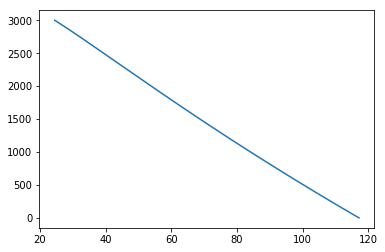

In [18]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(p, h)
plt.show()

In [17]:
class Check():
    def __init__(self):
        self.a = 0
        self.b = 3
        
class Check2(Check):
    def calc(self, a):
        self.a = self.a + a

In [19]:
check = Check()

check.a

check2 = Check2()

check2.a

check2.calc(4)

check2.a

4